In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
#ROws and columns in dataset
df.shape

(15000, 3)

In [ ]:
#Basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [ ]:
#Missing values
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [ ]:
#Duplicated value
df.duplicated().sum()

0

#Feature engineering on feature  'order_placed_at', 'order_delivered_at'


In [ ]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [ ]:
df['time_taken_for_delivery'] = df['order_delivered_at'] - df['order_placed_at']
df['time_taken_for_delivery'] = df['time_taken_for_delivery']/np.timedelta64(1,'m')

In [ ]:
df.dtypes

order_id                            int64
order_placed_at            datetime64[ns]
order_delivered_at         datetime64[ns]
time_taken_for_delivery           float64
dtype: object

In [ ]:
df['order_placed_date']=df['order_placed_at'].dt.date

In [ ]:
df['order_placed_time']=df['order_placed_at'].dt.time

In [ ]:
df['order_delivered_date']=df['order_delivered_at'].dt.date

In [ ]:
df['order_delivered_time']=df['order_delivered_at'].dt.time

In [ ]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056


Creating New Feature called time_period which will help to traffic of deliveries during differeent period of day

In [ ]:
#time_period feature
df['time_period'] = df['order_placed_at'].apply(lambda x: "late night" if x.hour > 1 and x.hour <= 4 else ("Morning" if x.hour > 4 and x.hour <= 12 else ("Afternoon" if x.hour > 12 and x.hour <= 16 else ("Evening" if x.hour > 16 and x.hour <=19 else "night"))))

In [ ]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night


In [ ]:
#countplot for time_period feature
df['time_period'].value_counts()

Morning       5002
night         3785
Afternoon     2452
Evening       1889
late night    1872
Name: time_period, dtype: int64

<Axes: xlabel='time_period', ylabel='Count'>

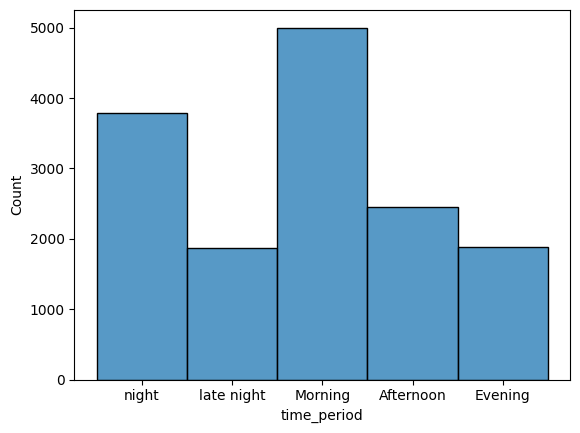

In [ ]:
sns.histplot(df['time_period'])

# Report
* during 4am to 12pm (morning) around 5002 orders are placed
* follwed by 3785 at night and 2452 at afternoon

 ### **conclusion** 
 We can put more delivery boys for morning and afternoon shift

Dropping feature order_placed_at and order_delivered_at

In [ ]:
df.drop(['order_placed_at', 'order_delivered_at'], axis=1, inplace=True)

In [ ]:
df.head()

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night


In [ ]:
df.dtypes

order_id                     int64
time_taken_for_delivery    float64
order_placed_date           object
order_placed_time           object
order_delivered_date        object
order_delivered_time        object
time_period                 object
dtype: object

In [ ]:
df['order_placed_day'] =  pd.to_datetime(df['order_placed_date']).dt.day_name()

In [ ]:
df['order_delivered_day'] =  pd.to_datetime(df['order_delivered_date']).dt.day_name()

In [ ]:
df.head()

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night,Wednesday,Wednesday
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night,Wednesday,Wednesday
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night,Wednesday,Wednesday
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night,Wednesday,Wednesday
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night,Wednesday,Wednesday


## Report 

Anyways delivery time will never be more than 2hr

but if customer placed order at 23.50 delivary will be reached on next day that's why we created order_delivered_day feature else order_placed_day feature is enough

## **Countplot for order_placed_day**


In [ ]:
df['order_placed_day'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_placed_day, dtype: int64

<Axes: xlabel='order_placed_day', ylabel='Count'>

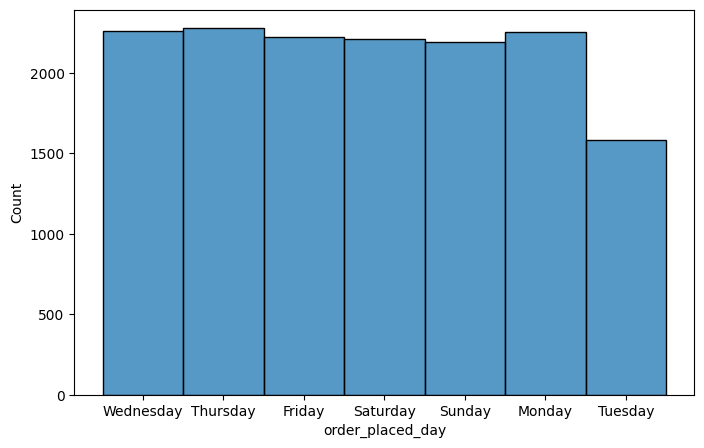

In [ ]:
#countplot for feature order_placed_day
plt.figure(figsize=(8,5))
sns.histplot(df['order_placed_day'])

## **Report**

Except **Tuesday** all others day has appox equal number of ordered placed


On Tuesday we can give some discount to customers so we can increase ordered on that day to

In [ ]:
df.head(1)

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night,Wednesday,Wednesday


In [ ]:
df.dtypes

order_id                     int64
time_taken_for_delivery    float64
order_placed_date           object
order_placed_time           object
order_delivered_date        object
order_delivered_time        object
time_period                 object
order_placed_day            object
order_delivered_day         object
dtype: object

In [ ]:
#analysing feature time_taken_for_delivery
df['time_taken_for_delivery'].min()

15.000010333333334

In [ ]:
df['time_taken_for_delivery'].mean()

20.49938932646778

In [ ]:
df['time_taken_for_delivery'].median()

15.797986066666667

In [ ]:
df['time_taken_for_delivery'].max()

7299.831374933333

In [ ]:
df['time_taken_for_delivery'].quantile(0.95)

27.261043996666658

<Axes: >

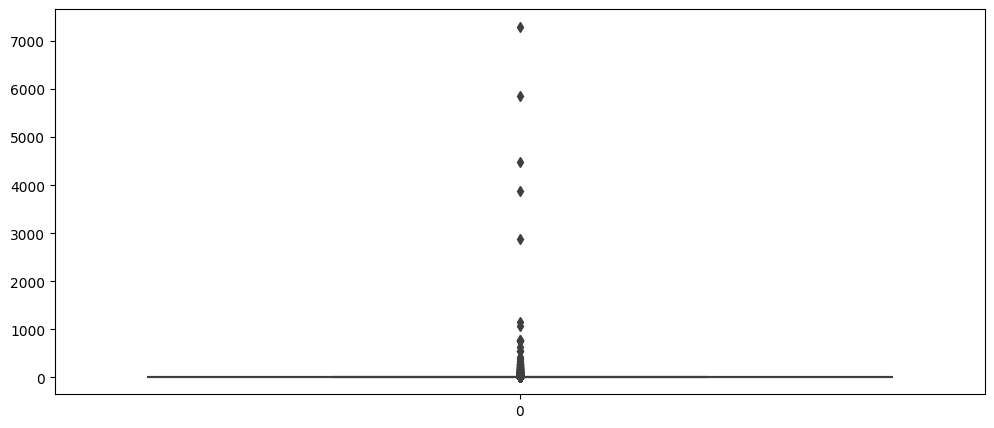

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(df['time_taken_for_delivery'])

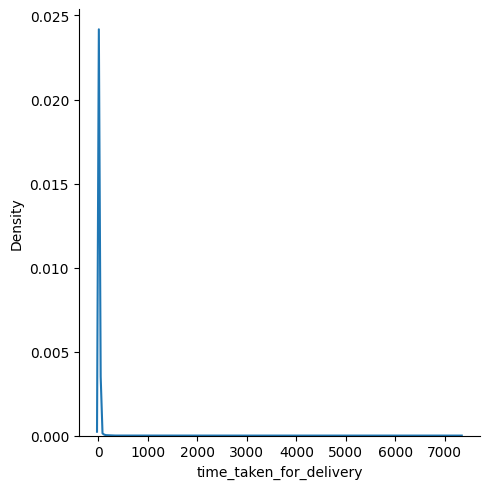

In [ ]:
sns.displot(df['time_taken_for_delivery'], kind='kde')

In [ ]:
count=0
for i in df['time_taken_for_delivery']:
  if i > 30.00:
    count=count+1
print(f"Out of 15k deliveries {count} deliveries are late")
    

Out of 15k deliveries 604 deliveries are late


In [ ]:
df.shape

(15000, 9)

In [ ]:
(604/df.shape[0])*100

4.026666666666666

In [ ]:
pd.set_option("display.max.rows", None)
df[df['time_taken_for_delivery']>1440]


,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
4165,1527276,5867.434753,2023-03-08,09:46:43,2023-03-12,11:34:09.085175,Morning,Wednesday,Sunday
5499,1528610,7299.831375,2023-03-10,17:06:22,2023-03-15,18:46:11.882496,Evening,Friday,Wednesday
10007,1533118,2883.124250,2023-03-19,00:56:34,2023-03-21,00:59:41.454974,night,Sunday,Tuesday
10225,1533336,4485.891210,2023-03-19,11:07:32,2023-03-22,13:53:25.472592,Morning,Sunday,Wednesday
14155,1537266,3888.444088,2023-03-26,09:54:24,2023-03-29,02:42:50.645252,Morning,Sunday,Wednesday


# Report 
* Fastest order delivered in 15mins (lowest time taken for one delivery)
* Highest time taken for one delivery is 7299mins (might be chance this order is placed through IRCTC service and the delivery is missied after next station avalible dominos restaurant they delivered the order)
* Average time for one delivery is 20.49mins
* 95% of the deliveries are delivered in time which is good for u kanav sir
* 4.02% deliveries are late which is less compare to on time delivered percentage
* 5 deliveries took more than 1day time to delivered

Final report:


* Most orders (5002) are placed at morning time between 4am - 12pm.
* Except tuesday all others day has apporox equal number of order placed
* Avg time taken for the one delivery is 20.49mins
* 95% of the order are delivered in time which is good news
* 5 deliveries took more than 1day time to delivered

Conclusion:

* We can put more delivery boys in morning and afternoon as the no. of orders are more
* We can give some discount on Tuesday to increase the no.of order
* atlast your shop is running all good kanav sir give us pizza party


